# Exploratory Data Analysis:

Exploratory data analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model.

Let’s try to break down this definition and understand different operations where EDA comes into play:
* First and foremost, EDA provides a stage for breaking down problem statements into smaller experiments which can help understand the dataset
* EDA provides relevant insights which help analysts make key business decisions
* The EDA step provides a platform to run all thought experiments and ultimately guides us towards making a critical decision

* Read and examine a dataset and classify variables by their type: 

* quantitative vs. categorical
* Handle categorical variables with numerically coded values
* Perform univariate and bivariate analysis and derive meaningful insights about the dataset
* Identify and treat missing values and remove dataset outliers
* Build a correlation matrix to identify relevant variables

In [23]:
import pandas as pd
import numpy as np

In [98]:
bd=pd.read_csv('bank.csv',sep=';')
bd.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [100]:
bd.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [101]:
bd.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [27]:
bd.age.nunique()

77

In [28]:
bd.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [29]:
bd.apply(lambda x: sum(x.isnull()),axis=0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [102]:
bd['dob'] = '2000-01-01'

In [31]:
bd.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dob          object
dtype: object

In [103]:
bd['dob'] = pd.to_datetime(bd['dob'])

In [107]:
x = '4'
print(x)
int(x)

4


4

In [104]:
bd.dtypes

age                   int64
job                  object
marital              object
education            object
default              object
balance               int64
housing              object
loan                 object
contact              object
day                   int64
month                object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
y                    object
dob          datetime64[ns]
dtype: object

# Visual Summary with seaborn

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

- Numerical variables : denisty plots , box plots 
- Numeric - Numeric : scatter plots, pairwise density plots
- Categorical data 
- Faceting in Categorical data
- Heatmaps 

## Single Numeric Column

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


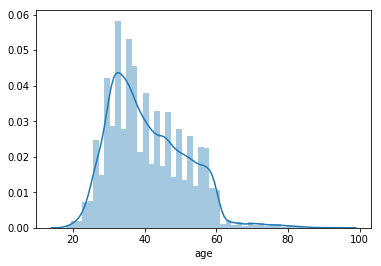

In [109]:
sns.distplot(bd['age'])

In [110]:
print("Minimum age in the data is:",bd.age.min())
print("Maximum age in the data is:",bd.age.max())
print("Range of age is from {} to {}, value is {}".format(bd.age.min(),bd.age.max(),bd.age.max()-bd.age.min()))
print("Default bin is 50, so each bar corresponds to the value of:",(bd.age.max()-bd.age.min())/50)

Minimum age in the data is: 18
Maximum age in the data is: 95
Range of age is from 18 to 95, value is 77
Default bin is 50, so each bar corresponds to the value of: 1.54


In [62]:
bd.age.max()-bd.age.min()

77

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


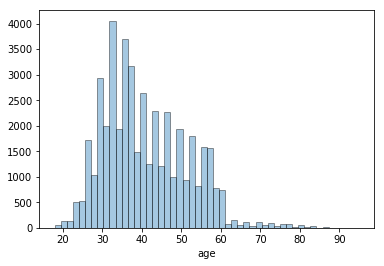

In [90]:
sns.distplot(bd['age'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1))

In [13]:
# help(sns.distplot)

In [111]:
print("Minimum age in the data is:",bd.age.min())
print("Maximum age in the data is:",bd.age.max())
print("Range of age is from format {} to {}".format(bd.age.min(),bd.age.max()))
print("Default bin is 11, so each bar corresponds to the value of:",(bd.age.max()-bd.age.min())/11)

Minimum age in the data is: 18
Maximum age in the data is: 95
Range of age is from format 18 to 95
Default bin is 11, so each bar corresponds to the value of: 7.0


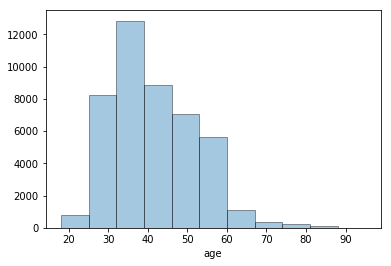

In [95]:
sns.distplot(bd['age'],kde=False,hist=True,bins=11,hist_kws=dict(edgecolor="k", linewidth=1))

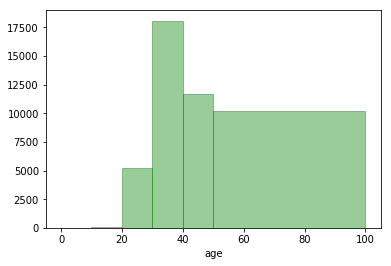

In [96]:
sns.distplot(bd['age'],kde=False,bins=[0, 10, 20, 30, 40, 50, 100],hist_kws=dict(edgecolor="g", linewidth=1),color='Green')
# see what various values to these options do

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


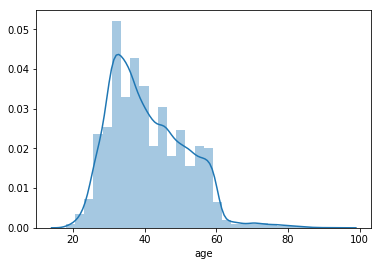

In [84]:
sns.distplot(bd['age'],kde=True,bins=30)
# see what various values to these options do

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


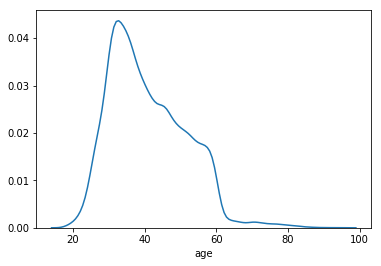

In [18]:
sns.distplot(bd['age'],kde=True,bins=30, hist=False)
# see what various values to these options do

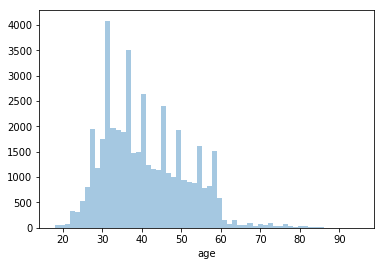

In [113]:
sns.distplot(bd['age'],kde=False,norm_hist=False,bins=60)

In [14]:
bd['age'].min(), bd['age'].max()

(18, 95)

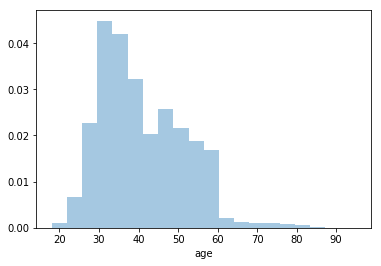

In [115]:
myplot=sns.distplot(bd['age'],kde=False,norm_hist=True,bins=20)

myimg=myplot.get_figure()
myimg.savefig('HistofAge.png')

In [116]:
myimg.savefig('HistogramofAge.jpg')

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


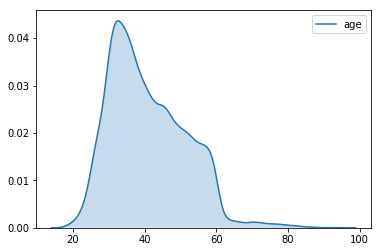

In [23]:
sns.kdeplot(bd['age'],shade=True)

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


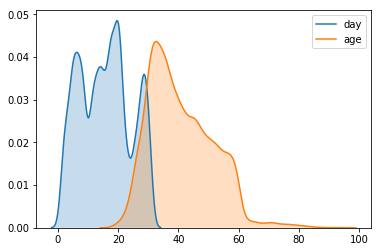

In [119]:
sns.kdeplot(bd['day'],shade=True)
sns.kdeplot(bd['age'],shade=True)

In [ ]:
# Q1(25) - (k)1.5(IQR) - lower whisker
# Q3(75) + (k)1.5(iqr) - upper whisker

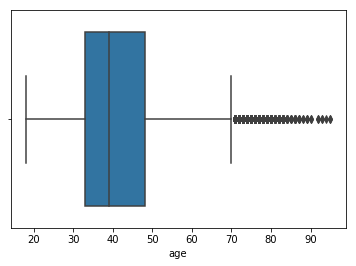

In [120]:
sns.boxplot(bd['age'])

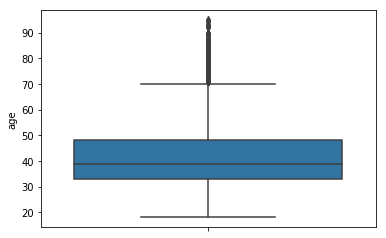

In [26]:
sns.boxplot(y='age',data=bd)
#sns.boxplot(x='age',data=bd)

## Explain the distribution - Symmetric and Non-symmetric


C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


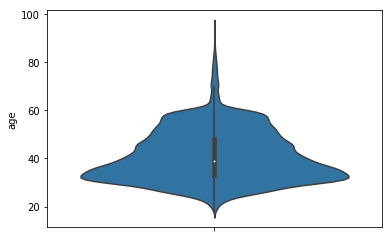

In [27]:
sns.violinplot(y='age',data=bd)

## numeric-numeric

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


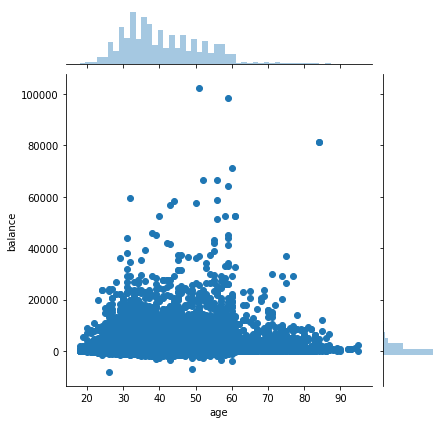

In [28]:
sns.jointplot(x="age", y="balance", data=bd)

C:\Users\Guhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


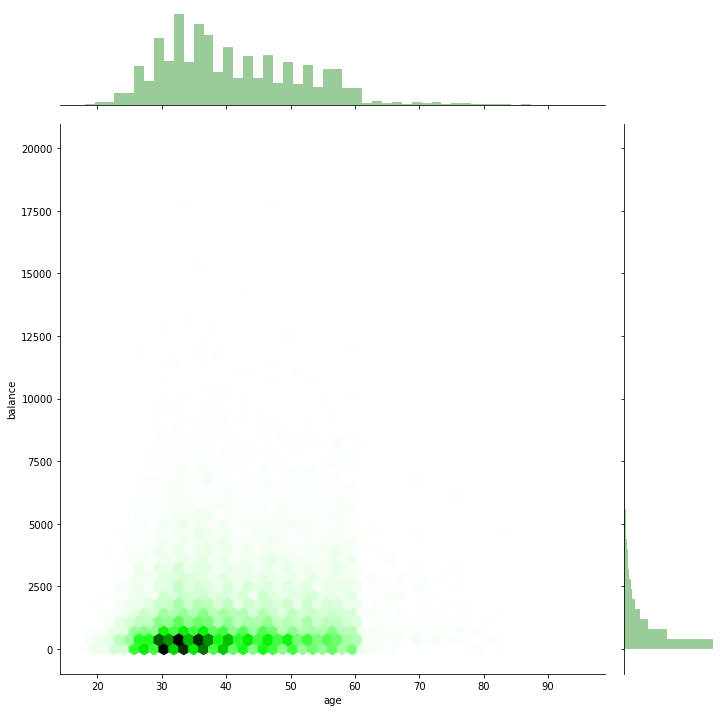

In [121]:
sns.jointplot(x="age", y="balance", data=bd.loc[(bd['balance']>0)&(bd['balance']<20000),:],kind="hex",size=10,color="g")
# used subset of data to see a more clear plot

#sns.jointplot(x="age", y="balance", data=bd.loc[(bd['balance']>0)&(bd['balance']<1000),:],kind="kde",size=10,color="g")


C:\Users\Guhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


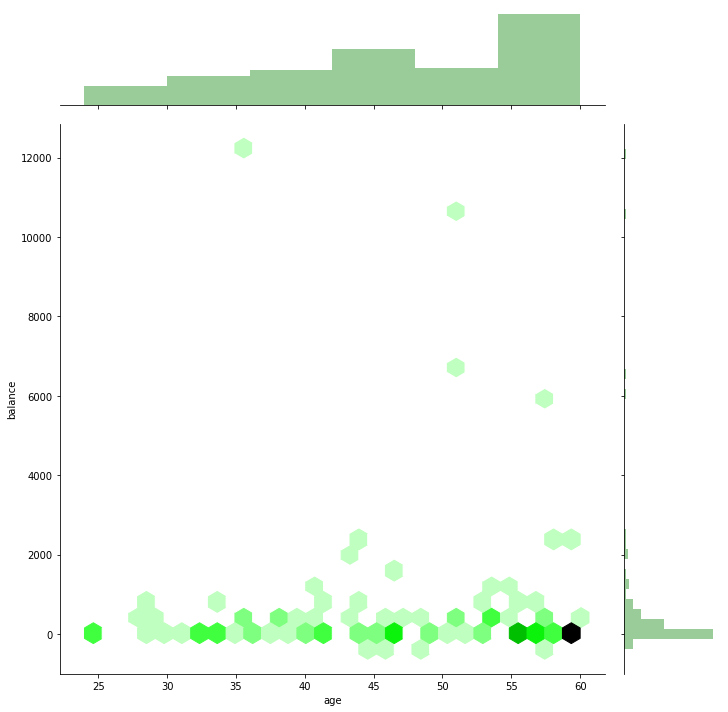

In [30]:
sns.jointplot(x="age", y="balance", data=bd.iloc[:100,:], kind="hex",size=10,color="g")
# used subset of data to see a more clear plot

In [31]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : strings or vectors
        Data or names of variables in ``data``.
    data : DataFrame, optional
        DataFrame when ``x`` and ``y`` are variable names.
    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
        Kind of plot to draw.
    stat_func : callable or None, optional
        *Deprecated*
    color : matplotlib color, optional
        Colo

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


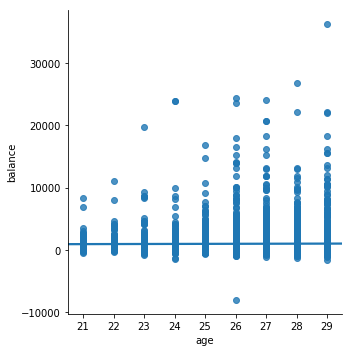

In [32]:
sns.lmplot('age', 'balance',data=bd.loc[(bd['age']>20)&(bd['age']<30),:],order=1)#, 
           #data=bd.iloc[1:100,:])

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


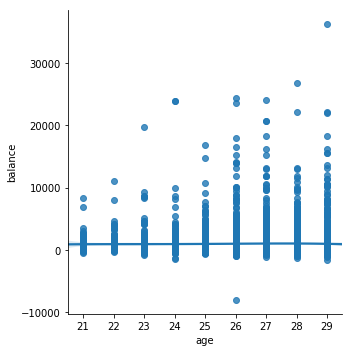

In [122]:
sns.lmplot('age', 'balance', 
           data=bd.loc[(bd['age']>20)&(bd['age']<30),:],order=4)

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


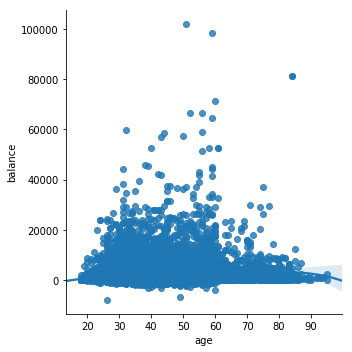

In [34]:
sns.lmplot('age', 'balance', 
           data=bd,order=4)

In [35]:
bd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'dob'],
      dtype='object')

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


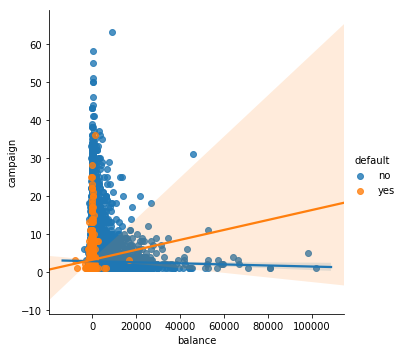

In [36]:
sns.lmplot('balance', 'campaign', 
           data=bd,hue='default')

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


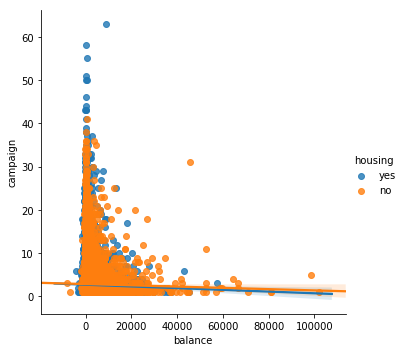

In [125]:
sns.lmplot('balance', 'campaign', data=bd, hue='housing')

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


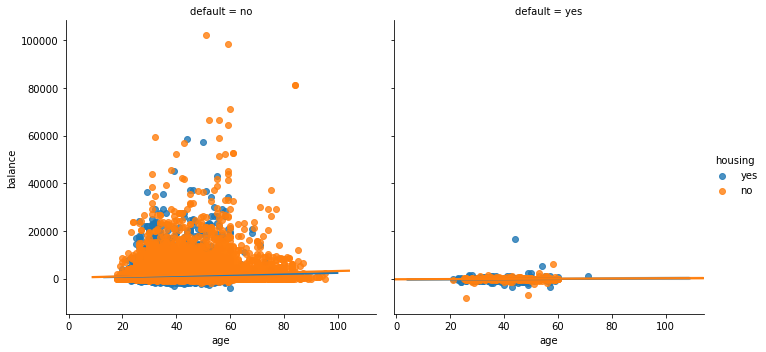

In [38]:
sns.lmplot('age', 'balance', data=bd, 
           hue='housing',
           col='default')

In [39]:
bd.loan.unique()

array(['no', 'yes'], dtype=object)

In [126]:
bd.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


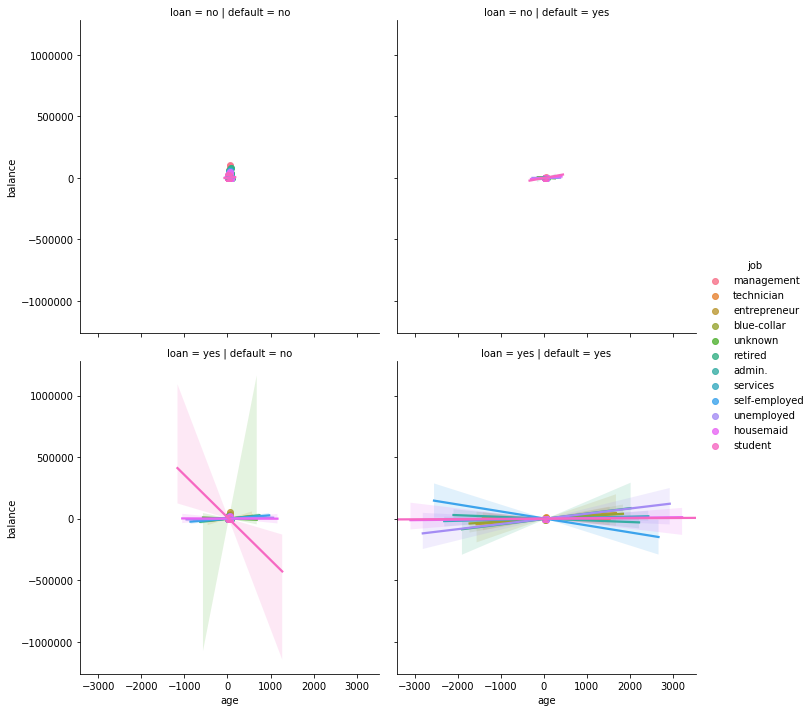

In [128]:
sns.lmplot('age', 'balance', 
           data=bd,
           hue='job',
           col='default',
           row='loan')

## Categorical

In [129]:
bd.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

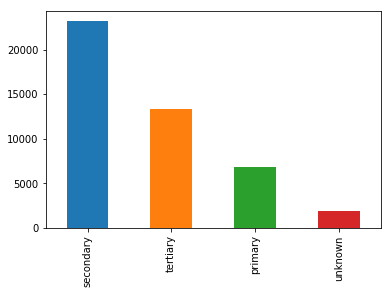

In [19]:
bd.education.value_counts().plot(kind='bar')

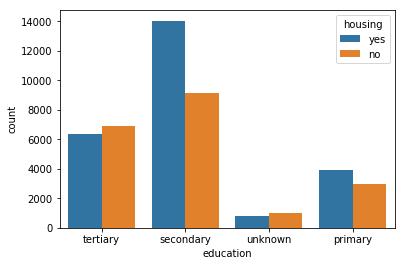

In [42]:
sns.countplot(x="education", data=bd, hue = 'housing')

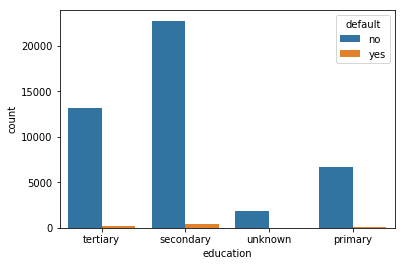

In [43]:
sns.countplot(x="education", data=bd,hue='default')

# explore sns.barplot

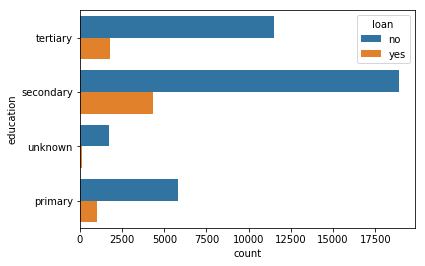

In [130]:
sns.countplot(y="education", data=bd,hue='loan')

# Numeric Categorical 

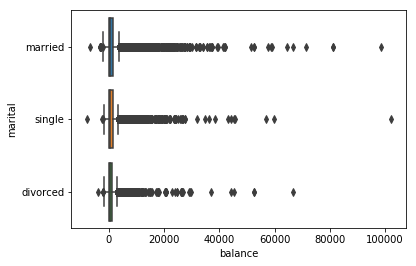

In [45]:
#sns.boxplot(x='age',data=bd)
sns.boxplot(x='balance',y='marital',data=bd)

# Heatmaps

**Correlation:**

Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficient: Pearson’s correlation (also called Pearson’s R) is a correlation coefficient commonly used in linear regression. 

Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:

1 indicates a strong positive relationship.
-1 indicates a strong negative relationship.
A result of zero indicates no relationship at all.

!['image.png'](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2009/11/pearsons-300x156.gif)


![image.png](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2012/10/pearson-2-small.png)

In [131]:
bd.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


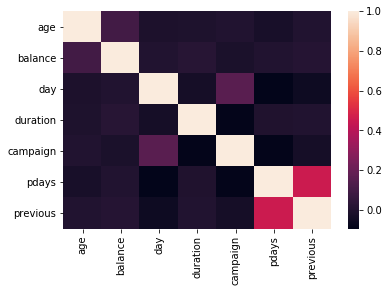

In [47]:
sns.heatmap(bd.corr())

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


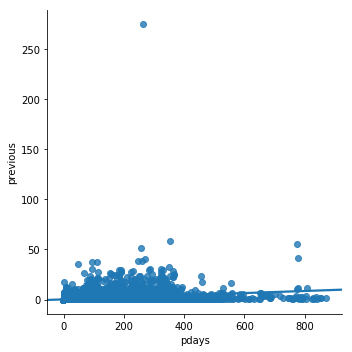

In [48]:
sns.lmplot(x='pdays',y='previous',data=bd)

C:\Users\Guhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


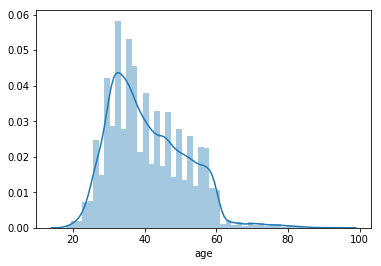

In [49]:
sns.distplot(bd['age'])

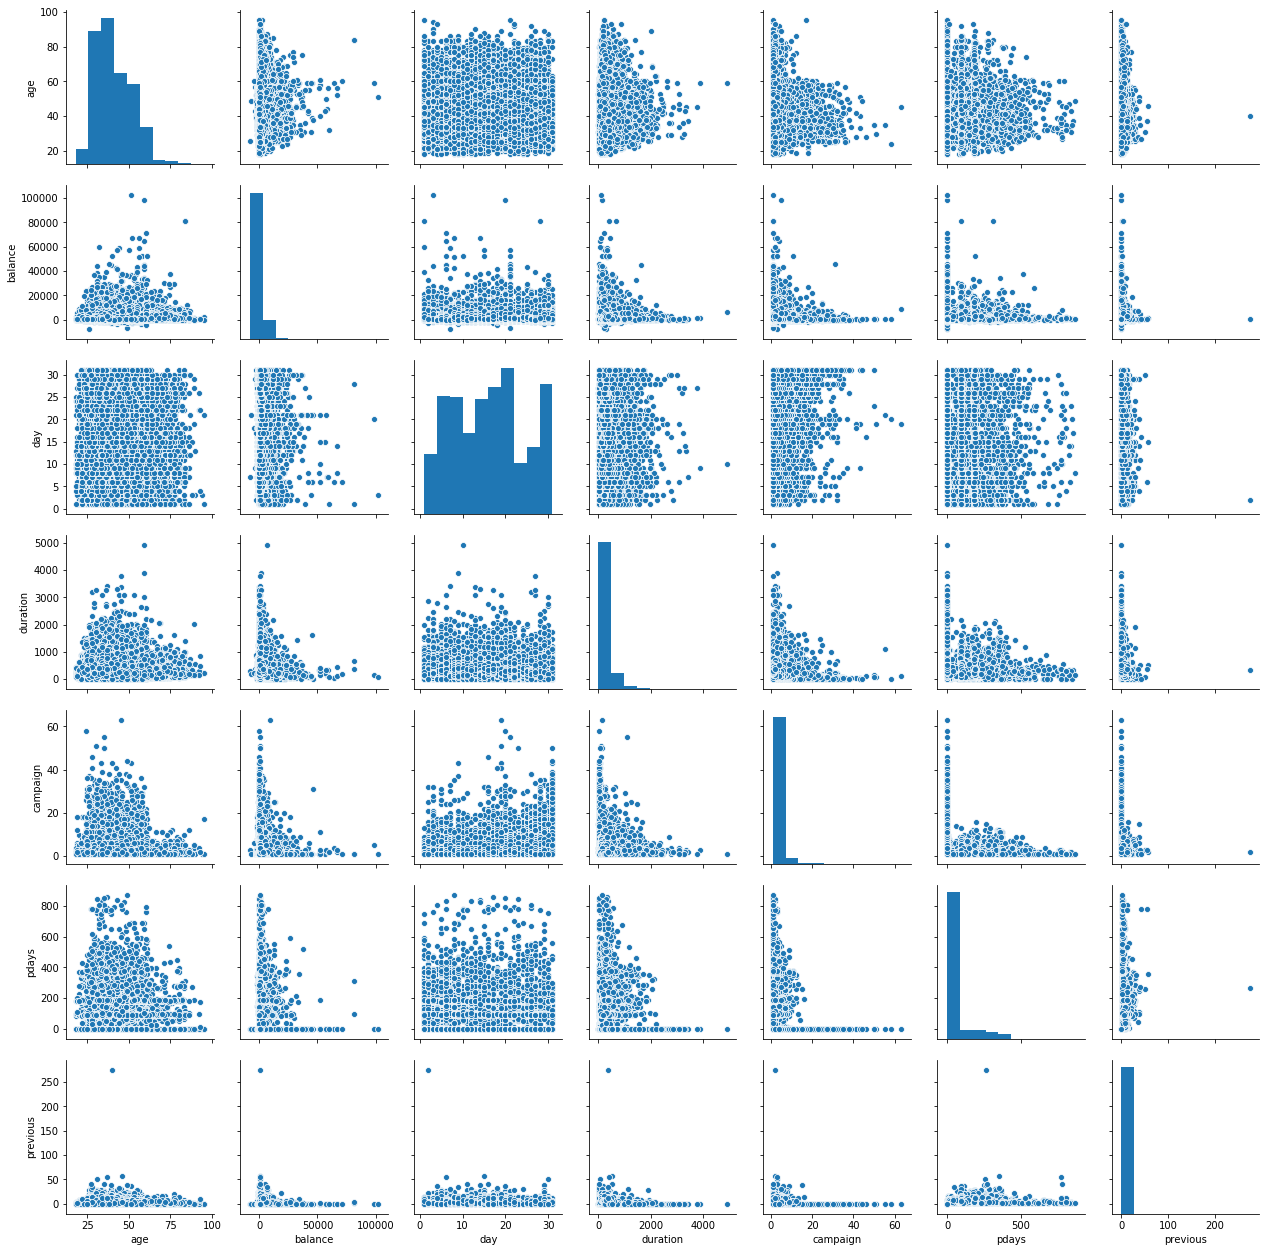

In [50]:
sns.pairplot(bd)

### Methods to Pre-Process Outliers:

**Outliers:-**
In statistics, an outlier is an observation point that is distant from other observations.

**IQR**

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers


In [132]:
bd.age.median()

39.0

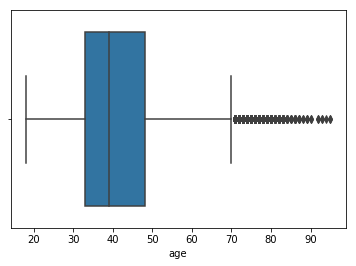

In [52]:
sns.boxplot(x='age',data=bd)

In [134]:
Q1 = bd.age.quantile(0.25)
print(Q1)
Q3 = bd.age.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
print(Q1 - (1.5 * IQR))
print(Q3 + (1.5 * IQR))

33.0
48.0
15.0
10.5
70.5


In [143]:
bd[~((bd.age < (Q1 - 1.5 * IQR)) |(bd.age > (Q3 + 1.5 * IQR)))].age.median()

39.0

* **Mean/Median or random Imputation**
   
If we have reasons to believe that outliers are due to mechanical error or problems during measurement. That means, the outliers are in nature similar to missing data, then any method used for missing data imputation can we used to replace outliers. The number are outliers are small (otherwise they won't be called outliers) and it's reasonable to use mean/median/random imputation to replace them.

In [20]:
median = bd.loc[bd['age']<70, 'age'].median()
median

39.0

In [21]:
median = bd.loc[bd['age']<70, 'age'].median()
bd.loc[bd.age > 70, 'age'] = np.nan
bd.fillna(median,inplace=True)

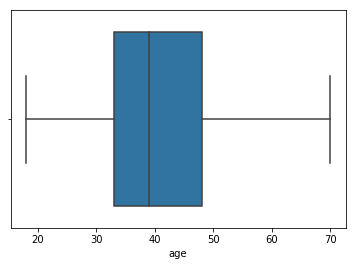

In [22]:
sns.boxplot(x = bd['age'])

* **Trimming**

In this method, we discard the outliers completely. That is, eliminate the data points that are considered as outliers. In situations where you won’t be removing a large number of values from the dataset, trimming is a good and fast approach.


In [146]:
index = bd[(bd['age'] >= 60)].index
bd.drop(index, inplace=True)

Int64Index([], dtype='int64')


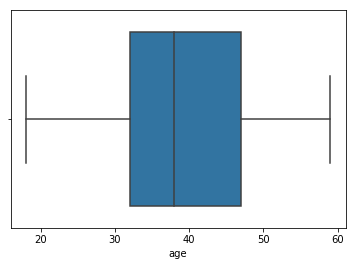

In [145]:
sns.boxplot(x = bd['age'])

* **Top, Bottom and Zero Coding**

Top Coding means capping the maximum of the distribution at an arbitrary set value. A top coded variable is one for which data points above an upper bound are censored. By implementing top coding, the outlier is capped at a certain maximum value and looks like many other observations.
Bottom coding is analogous but on the left side of the distribution. That is, all values below a certain threshold, are capped to that threshold. If the threshold is zero, then it is known as zero-coding. For example, for variables like “age” or “earnings”, it is not possible to have negative values. Thus it’s reasonable to cap the lowest value to zero.


In [23]:
print('age > 55: {}'.format(bd[bd.age>55].shape[0]))
print('Percentage of outliers: {}'.format(bd[bd.age>55].shape[0]/np.float(bd.shape[0])))

age > 55: 4413
Percentage of outliers: 0.09760898896286302


In [24]:
bd.loc[bd.age>55,'age'] = 50
bd.age.max()

55.0

* **Discretization**
Discretization is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that spans the range of the variable’s values. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval/bucket.
There are several approaches to transform continuous variables into discrete ones. This process is also known as binning, with each bin being each interval.

In [34]:
list(range(15,86,5))

[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

In [148]:
ages = ['15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84']
bd['age_group'] = pd.cut(bd.age,range(15,86,5),right=False, labels=ages)
bd[['age','age_group']].head(15)

,age,age_group
0,58,55-59
1,44,40-44
2,33,30-34
3,47,45-49
4,33,30-34
5,35,35-39
6,28,25-29
7,42,40-44
8,58,55-59
9,43,40-44


In [104]:
bd.age_group.value_counts()

30-34    9740
35-39    8836
50-54    7604
40-44    6185
45-49    5470
25-29    4464
55-59     806
20-24     762
15-19      47
80-84       0
75-79       0
70-74       0
65-69       0
60-64       0
Name: age_group, dtype: int64

**List of Techniques**

- Imputation
- Binning
- Log Transform, Scaling
- One-Hot Encoding
- Grouping Operations
- Feature Split


# Imputation

There are many options we could consider when replacing a missing value, for example:

- A constant value that has meaning within the domain, such as 0, distinct from all other values.
- A value from another randomly selected record.
- A mean, median or mode value for the column.
- A value estimated by another predictive model.

## https://machinelearningmastery.com/handle-missing-data-python/



In [153]:
# Binning 
import pandas as pd
import numpy as np
pd.cut(np.array([1, 12, 5, 4, 6, 4,9]),4, labels=["bad", "medium", "good","best"])

[bad, best, medium, medium, medium, medium, good]
Categories (4, object): [bad < medium < good < best]

In [27]:
#One-Hot Encoding
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
print(df)
pd.get_dummies(df)

   A  B  C
0  a  b  1
1  b  a  2
2  a  c  3


,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [32]:
print(df)
df.iloc[0,1]

   A  B  C
0  a  b  1
1  b  a  2
2  a  c  3


'b'

In [155]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM', 'Air France', 'British Airways', 
                               'Air France', 'Swiss Air']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM
1,MAdrid_miLAN,NaN,[],Air France
2,londON_StockhOlm,10065.0,"[24, 43, 87]",British Airways
3,Budapest_PaRis,NaN,[13],Air France
4,Brussels_londOn,10085.0,"[67, 32]",Swiss Air


# 1 
**Some values in the the FlightNumber column are missing (they are NaN). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify df to fill in these missing numbers and make the column an integer column (instead of a float column).


In [13]:
#1 Fill NaN with the values 
df.FlightNumber.interpolate(inplace=True)
df.FlightNumber = df.FlightNumber.astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM
1,MAdrid_miLAN,10055,[],Air France
2,londON_StockhOlm,10065,"[24, 43, 87]",British Airways
3,Budapest_PaRis,10075,[13],Air France
4,Brussels_londOn,10085,"[67, 32]",Swiss Air


# 2
**The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame.**

In [14]:
temp =  df.From_To.str.split('_',expand=True)
temp.columns = ['From','To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


# 3
**Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)**

In [15]:
temp.From = temp.From.str.capitalize()
temp.To = temp.To.str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


# 4
**Delete the From_To column from df and attach the temporary DataFrame 'temp' from the previous questions.**

In [16]:
df.drop('From_To',axis=1,inplace=True)
df = df.join(temp)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


# 5
In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [17]:
delays = df.RecentDelays.apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1,len(delays.columns)+1)]
delays

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [18]:
delays = df.RecentDelays.apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1,len(delays.columns)+1)]
df = df.drop('RecentDelays',axis=1).join(delays)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


In [159]:
df.fillna(0, inplace=True)

In [160]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM
1,MAdrid_miLAN,0.0,[],Air France
2,londON_StockhOlm,10065.0,"[24, 43, 87]",British Airways
3,Budapest_PaRis,0.0,[13],Air France
4,Brussels_londOn,10085.0,"[67, 32]",Swiss Air
